In [1]:
# 합성곱 신경망의 가중치
from tensorflow import keras

In [2]:
model = keras.models.load_model('best-cnn-model.h5')

In [3]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 100)              

In [4]:
model.layers

In [5]:
conv =  model.layers[0]
conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [6]:
conv_weight = conv.weights[0].numpy()
conv_weight.mean() , conv_weight.std()

(-0.0011222983, 0.14953879)

In [7]:
import matplotlib.pyplot as plt

In [8]:
conv_weight.shape

(3, 3, 1, 32)

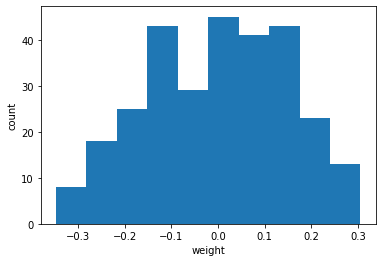

In [9]:
plt.hist(conv_weight.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [10]:
conv_weight.shape

(3, 3, 1, 32)

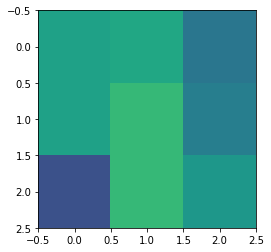

In [11]:
conv_weight[:,:,0,0].shape  # 특성맵.. 즉 필터   (3,3)
plt.imshow(conv_weight[:,:,0,0], vmin=-0.5, vmax=0.5)

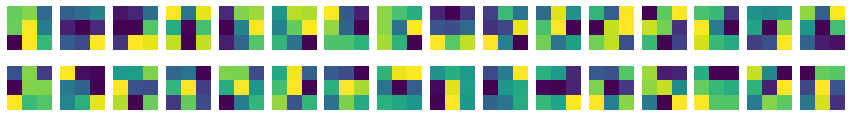

In [12]:
 # 2 * 16
_,axs = plt.subplots(2,16,figsize=(15,2)) 
cnt = 0
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weight[:,:,0,cnt])
        axs[i,j].axis('off')
        cnt += 1
plt.show()        

In [13]:
# 기존에 만들어진 모델에서 특정 레이아웃을 추출 해서 신경망 구조를 만들수 있음
temp_model =  keras.Sequential()
temp_model.add(keras.layers.Conv2D(32, kernel_size=3,activation='relu',padding='same'
                                   ,input_shape=(28,28,1)))


In [14]:
temp_model_conv =  temp_model.layers[0]

In [15]:
temp_model_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [16]:
(x_train,y_train),(x_test_original,y_test_original) =  keras.datasets.fashion_mnist.load_data()

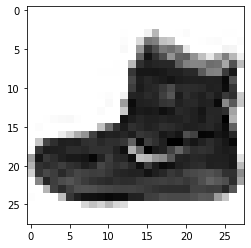

In [17]:
plt.imshow(x_train[0],cmap='gray_r')

In [18]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_10_input')>

In [19]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_10')>

In [20]:
conv_active =  keras.Model(model.input,model.layers[0].output)

In [21]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
x_train_scaled =  ss.fit_transform(x_train.reshape(-1,28*28))


In [32]:
(x_train_scaled - x_train_scaled.mean()) / x_train_scaled.std()

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [22]:
featrue_map = conv_active.predict(x_train_scaled.reshape(-1,28,28,1))
featrue_map.shape

1875/1875 [==============================] - 23s 12ms/step


ResourceExhaustedError: OOM when allocating tensor with shape[60000,28,28,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:ConcatV2] name: concat